In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

In [59]:
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255.


data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255.
_,m_train=X_train.shape


In [60]:
def init_param():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A=np.exp(Z)/sum(np.exp(Z))
    return A

def deriv_ReLU(Z):
    return Z>0

def forward_prop(w1,b1,w2,b2,X):
    Z1=w1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=w2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    one_hot_y=one_hot(Y)
    dZ2=A2 - one_hot_y
    dw2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dw1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2


In [61]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,epochs,alpha):
    w1,b1,w2,b2=init_param()
    for i in range(epochs):
        Z1,A1,Z2,A2=forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2=back_prop(Z1,A1,Z2,A2,w1,w2,X,Y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print("Epoch: ",i)
            predictions=get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions,Y))
    return w1,b1,w2,b2

In [62]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,500,0.10)

Epoch:  0
[6 4 7 ... 7 7 4] [3 7 9 ... 1 3 7]
Accuracy:  0.10717073170731707
Epoch:  10
[4 7 7 ... 7 7 4] [3 7 9 ... 1 3 7]
Accuracy:  0.1655609756097561
Epoch:  20
[4 7 7 ... 1 1 4] [3 7 9 ... 1 3 7]
Accuracy:  0.2557317073170732
Epoch:  30
[4 7 7 ... 1 1 4] [3 7 9 ... 1 3 7]
Accuracy:  0.3444634146341463
Epoch:  40
[4 7 7 ... 1 1 4] [3 7 9 ... 1 3 7]
Accuracy:  0.42860975609756097
Epoch:  50
[3 7 9 ... 1 1 4] [3 7 9 ... 1 3 7]
Accuracy:  0.49234146341463414
Epoch:  60
[1 7 9 ... 1 2 4] [3 7 9 ... 1 3 7]
Accuracy:  0.5411219512195122
Epoch:  70
[3 7 9 ... 1 2 9] [3 7 9 ... 1 3 7]
Accuracy:  0.5835121951219512
Epoch:  80
[3 7 9 ... 1 2 9] [3 7 9 ... 1 3 7]
Accuracy:  0.6186585365853658
Epoch:  90
[3 7 9 ... 1 2 9] [3 7 9 ... 1 3 7]
Accuracy:  0.648219512195122
Epoch:  100
[3 7 9 ... 1 2 9] [3 7 9 ... 1 3 7]
Accuracy:  0.6731463414634147
Epoch:  110
[3 7 9 ... 1 2 9] [3 7 9 ... 1 3 7]
Accuracy:  0.6936341463414634
Epoch:  120
[3 7 9 ... 1 2 9] [3 7 9 ... 1 3 7]
Accuracy:  0.711317073170

In [63]:
def make_predictions(X,w1,b1,w2,b2):
 _, _, _, A2=forward_prop(w1,b1,w2,b2,X)
 predictions=get_predictions(A2)
 return predictions

def test_prediction(index,w1,b1,w2,b2):
 current_image=X_train[:,index,None]
 prediction=make_predictions(X_train[:,index,None],w1,b1,w2,b2)
 label=Y_train[index]
 print("Prediction: ",prediction)
 print("Label: ",label)
 current_image=current_image.reshape(28,28)*255
 plt.gray()
 plt.imshow(current_image,interpolation='nearest')
 plt.show

Prediction:  [7]
Label:  7


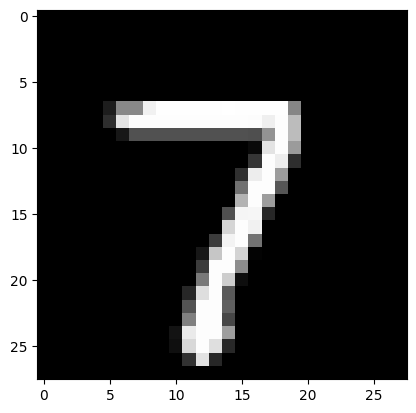

In [71]:
test_prediction(9,w1,b1,w2,b2)